### 🔍 Exercise - Analyzing Data Science Job Demand 💼

#### 📚 **Topics Covered**

This exercise goes over:
- 🧹 Data cleaning and preparation
- 🗂️ Data management
- 📅 Extract from datetime
- 📊 Pivot tables
- 🏷️ Index management

#### 🤔 **Question**

> In our project, we want to see how in-demand skills are trending for data jobs. But before we do that, let's look at:
>
> - The **general trend of data jobs in demand**. We're going to look at it by month.

## ⬇️ Load Data

In [8]:
# Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Specify the file format explicitly
dataset = load_dataset('csv', data_files='D:/Udemy/Luke/Data Analysis Mastering/Python for Data Analytics/DataSets/data_jobs.csv')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


### 📈 Demand of Data Jobs

1️⃣ The first step is to only look at roles in the 🇺🇸 United States. So, we're going to create a 📋 copy of our DataFrame and filter it to only include these specific roles.

In [9]:
df_us = df[df['job_country'] == 'United States'].copy()

2.  Since we're getting the count by **month** 📅, we need to **aggregate** the data by month.
    > We can do this by first extracting the month from our `job_posted_date` column.

In [10]:
# extract the month name from 'job_posted_date'
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

3️⃣ Next, let's create a **pivot table** 📊 by `month` 📅 and `job_title_short` 💼 to get the count.

In [11]:
df_us_pivot = df_us.pivot_table(index='job_posted_month' , columns='job_title_short',aggfunc='size')

In [12]:
df_us.pivot_table

<bound method DataFrame.pivot_table of              job_title_short  \
0       Senior Data Engineer   
3              Data Engineer   
5              Data Engineer   
6       Senior Data Engineer   
9             Data Scientist   
...                      ...   
785673        Data Scientist   
785685          Data Analyst   
785692        Data Scientist   
785703          Data Analyst   
785705          Data Analyst   

                                                job_title      job_location  \
0       Senior Clinical Data Engineer / Principal Clin...     Watertown, CT   
3       LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...   San Antonio, TX   
5                                       GCP Data Engineer          Anywhere   
6                       Senior Data Engineer  - GCP Cloud      Dearborn, MI   
9                                       Data Scientist II          Anywhere   
...                                                   ...               ...   
785673                 

**4. Let's sort this. 📈**

> **NOTE:** 💡 See the bottom of this notebook for an easier way to do this. 👇

In [16]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
df_us_pivot = df_us_pivot.reset_index()
df_us_pivot['job_posted_month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'] , format='%B').dt.month
df_us_pivot = df_us_pivot.sort_values('job_posted_month_no')
df_us_pivot = df_us_pivot.set_index('job_posted_month')

df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


**5. Let's now graph this. 📈**

Now we could plot all of this data. 📊

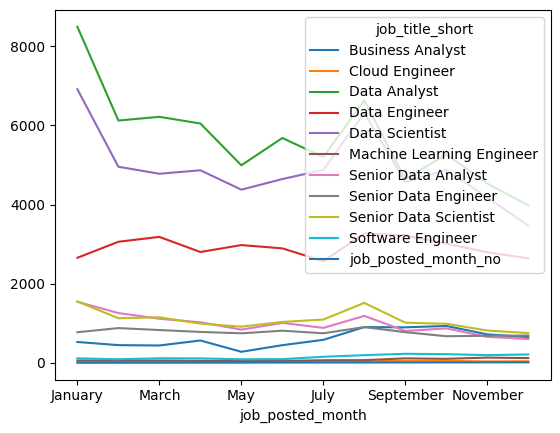

In [17]:
df_us_pivot.plot(kind='line')
plt.show()

Instead we'll just focus on the top 3 roles.

In [19]:
top_3 = df_us['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

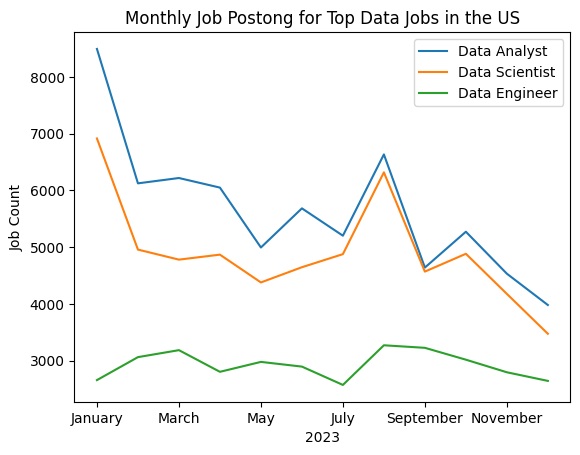

In [20]:
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postong for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

### Easier Method to Sort Months
After filming the video portion for this I found there is an easier way to sort the months. using the .to_period('M') method.

In [22]:
# extract the month name from 'job_posted_date'
df_us['job_posted_month'] = df_us['job_posted_date'].dt.to_period('M')

In [23]:
df_us_pivot = df_us.pivot_table(index='job_posted_month' , columns='job_title_short',aggfunc='size')
df_us_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,527,36,8494,2655,6915,60,1544,773,1552,114
2023-02,447,24,6124,3060,4956,56,1258,878,1127,90
2023-03,438,19,6218,3183,4779,59,1114,829,1150,115
2023-04,565,40,6049,2801,4867,51,1025,781,991,112
2023-05,279,20,4993,2976,4377,49,839,746,914,90
2023-06,446,32,5683,2893,4645,48,1009,812,1033,93
2023-07,581,39,5201,2570,4876,65,883,747,1095,153
2023-08,903,39,6634,3269,6318,68,1186,903,1515,194
2023-09,897,50,4639,3224,4568,113,805,775,1014,228


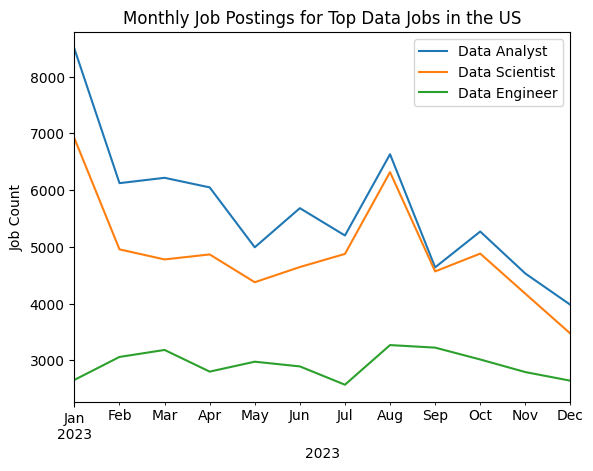

In [24]:
df_us_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()